In [94]:
!pip install pyspark

In [95]:
import pandas as pd 
import numpy as np
import pyspark

In [96]:
from pyspark.sql import SparkSession

In [97]:
spark = SparkSession.builder.appName("CarPrediction").getOrCreate()

In [98]:
# Using read.csv to read the dataset
df = spark.read.csv("./audi.csv", inferSchema=True, header=True)

In [99]:
# Checks if there are any null values in the column
for col in df.columns:
  print(col, "\t", "with null values: ", df.filter(df[col].isNull()).count())

model 	 with null values:  0
year 	 with null values:  0
price 	 with null values:  0
transmission 	 with null values:  0
mileage 	 with null values:  0
fuelType 	 with null values:  0
tax 	 with null values:  0
mpg 	 with null values:  0
engineSize 	 with null values:  0


In [100]:
# Checks if there are any values with '?'
for col in df.columns:
  print(col, "\t", "with ? values: ", df.filter(df[col]=="?").count())

model 	 with ? values:  0
year 	 with ? values:  0
price 	 with ? values:  0
transmission 	 with ? values:  0
mileage 	 with ? values:  0
fuelType 	 with ? values:  0
tax 	 with ? values:  0
mpg 	 with ? values:  0
engineSize 	 with ? values:  0


In [101]:
df.printSchema() # outputs the schema types which are automatically determined by spark

root
 |-- model: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- price: integer (nullable = true)
 |-- transmission: string (nullable = true)
 |-- mileage: integer (nullable = true)
 |-- fuelType: string (nullable = true)
 |-- tax: integer (nullable = true)
 |-- mpg: double (nullable = true)
 |-- engineSize: double (nullable = true)



In [102]:
df.show()

+-----+----+-----+------------+-------+--------+---+----+----------+
|model|year|price|transmission|mileage|fuelType|tax| mpg|engineSize|
+-----+----+-----+------------+-------+--------+---+----+----------+
|   A1|2017|12500|      Manual|  15735|  Petrol|150|55.4|       1.4|
|   A6|2016|16500|   Automatic|  36203|  Diesel| 20|64.2|       2.0|
|   A1|2016|11000|      Manual|  29946|  Petrol| 30|55.4|       1.4|
|   A4|2017|16800|   Automatic|  25952|  Diesel|145|67.3|       2.0|
|   A3|2019|17300|      Manual|   1998|  Petrol|145|49.6|       1.0|
|   A1|2016|13900|   Automatic|  32260|  Petrol| 30|58.9|       1.4|
|   A6|2016|13250|   Automatic|  76788|  Diesel| 30|61.4|       2.0|
|   A4|2016|11750|      Manual|  75185|  Diesel| 20|70.6|       2.0|
|   A3|2015|10200|      Manual|  46112|  Petrol| 20|60.1|       1.4|
|   A1|2016|12000|      Manual|  22451|  Petrol| 30|55.4|       1.4|
|   A3|2017|16100|      Manual|  28955|  Petrol|145|58.9|       1.4|
|   A6|2016|16500|   Automatic|  5

In [103]:
# Checking the columns of the dataframe 
df.columns

['model',
 'year',
 'price',
 'transmission',
 'mileage',
 'fuelType',
 'tax',
 'mpg',
 'engineSize']

In [104]:
# Checking the type of each column in the dataframe
df.describe()

DataFrame[summary: string, model: string, year: string, price: string, transmission: string, mileage: string, fuelType: string, tax: string, mpg: string, engineSize: string]

In [105]:
# taking the cars whose price is less than 15000 and the transmission is Manual
df.filter((df["transmission"] == "Manual") & (df["price"]<15000)).show()

+-----+----+-----+------------+-------+--------+---+----+----------+
|model|year|price|transmission|mileage|fuelType|tax| mpg|engineSize|
+-----+----+-----+------------+-------+--------+---+----+----------+
|   A1|2017|12500|      Manual|  15735|  Petrol|150|55.4|       1.4|
|   A1|2016|11000|      Manual|  29946|  Petrol| 30|55.4|       1.4|
|   A4|2016|11750|      Manual|  75185|  Diesel| 20|70.6|       2.0|
|   A3|2015|10200|      Manual|  46112|  Petrol| 20|60.1|       1.4|
|   A1|2016|12000|      Manual|  22451|  Petrol| 30|55.4|       1.4|
|   A6|2015|14000|      Manual|  61176|  Diesel| 30|62.8|       2.0|
|   A1|2017|10800|      Manual|  31447|  Petrol|145|67.3|       1.0|
|   A3|2015|11300|      Manual|  75619|  Diesel| 20|68.9|       2.0|
|   A4|2016|12750|      Manual|  52561|  Diesel|  0|74.3|       2.0|
|   A1|2014|11000|      Manual|  34315|  Petrol|125|53.3|       1.4|
|   A3|2016|10200|      Manual|  66369|  Diesel|  0|83.1|       1.6|
|   A1|2013| 7000|      Manual|  7

In [106]:
df.groupBy("model")

In [107]:
df.groupBy("model").count().show()

+-----+-----+
|model|count|
+-----+-----+
|   A7|  122|
|  SQ7|    8|
|   A4| 1381|
|  RS3|   33|
|   S3|   18|
|  RS5|   29|
|  RS6|   39|
|  SQ5|   16|
|   S4|   12|
|   Q8|   69|
|  RS4|   31|
|   A1| 1347|
|   A3| 1929|
|   Q2|  822|
|  RS7|    1|
|   Q7|  397|
|   Q3| 1417|
|   R8|   28|
|   S5|    3|
|   Q5|  877|
+-----+-----+
only showing top 20 rows



In [108]:
df.groupby("model").mean()[["model","avg(price)"]].show()

+-----+------------------+
|model|        avg(price)|
+-----+------------------+
|   A7|28865.516393442624|
|  SQ7|           49269.0|
|   A4|20255.450398262128|
|  RS3| 34050.51515151515|
|   S3|20379.444444444445|
|  RS5|51265.206896551725|
|  RS6|  55963.8717948718|
|  SQ5|        31415.8125|
|   S4|31248.083333333332|
|   Q8|60115.014492753624|
|  RS4|  50151.6129032258|
|   A1|14327.750556792873|
|   A3|17408.522032141005|
|   Q2|22516.975669099756|
|  RS7|           33490.0|
|   Q7|44788.319899244336|
|   Q3| 22999.26182074806|
|   R8| 97652.21428571429|
|   S5|           15980.0|
|   Q5|30445.688711516534|
+-----+------------------+
only showing top 20 rows



In [109]:
df.groupBy("year").mean()[["year","avg(tax)"]].show()

+----+------------------+
|year|          avg(tax)|
+----+------------------+
|2003|255.83333333333334|
|2007|          340.9375|
|2018| 146.1747685185185|
|2015| 98.95395395395396|
|2006| 371.1111111111111|
|2013|125.97938144329896|
|1997|             265.0|
|2014| 129.0268456375839|
|2019|  145.573975602127|
|2004|             319.0|
|1998|             265.0|
|2020| 145.5377094972067|
|2012|132.11764705882354|
|2009|223.47826086956522|
|2016| 85.06364562118127|
|2005| 269.2857142857143|
|2010|            176.25|
|2011| 160.2127659574468|
|2008|252.38095238095238|
|2017|123.17054263565892|
+----+------------------+
only showing top 20 rows



In [110]:
df.take(10)

[Row(model=' A1', year=2017, price=12500, transmission='Manual', mileage=15735, fuelType='Petrol', tax=150, mpg=55.4, engineSize=1.4),
 Row(model=' A6', year=2016, price=16500, transmission='Automatic', mileage=36203, fuelType='Diesel', tax=20, mpg=64.2, engineSize=2.0),
 Row(model=' A1', year=2016, price=11000, transmission='Manual', mileage=29946, fuelType='Petrol', tax=30, mpg=55.4, engineSize=1.4),
 Row(model=' A4', year=2017, price=16800, transmission='Automatic', mileage=25952, fuelType='Diesel', tax=145, mpg=67.3, engineSize=2.0),
 Row(model=' A3', year=2019, price=17300, transmission='Manual', mileage=1998, fuelType='Petrol', tax=145, mpg=49.6, engineSize=1.0),
 Row(model=' A1', year=2016, price=13900, transmission='Automatic', mileage=32260, fuelType='Petrol', tax=30, mpg=58.9, engineSize=1.4),
 Row(model=' A6', year=2016, price=13250, transmission='Automatic', mileage=76788, fuelType='Diesel', tax=30, mpg=61.4, engineSize=2.0),
 Row(model=' A4', year=2016, price=11750, transm

**Performing Data Visualization**
* Here we perform data visualization using matplotlib plotting functions

In [111]:
# Performing data visualization
import matplotlib.pyplot as plt


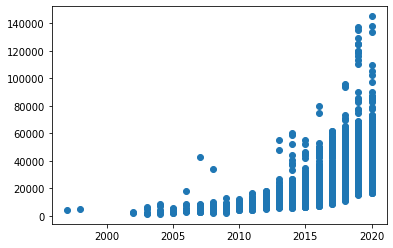

In [112]:
# Relationship between year and price
x1 = df.toPandas()["year"].values.tolist()
y1 = df.toPandas()["price"].values.tolist()
plt.scatter(x1,y1)


Text(0, 0.5, 'Model')

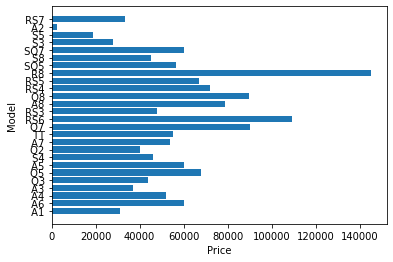

In [113]:
# Relationship between model and price
x2 = df.toPandas()["model"].values.tolist()
y2 = df.toPandas()["price"].values.tolist()
ax = plt.subplot()
ax.barh(x2,y2)
ax.set_xlabel("Price")
ax.set_ylabel("Model")

Text(0.5, 1.0, 'Mileage Per Model')

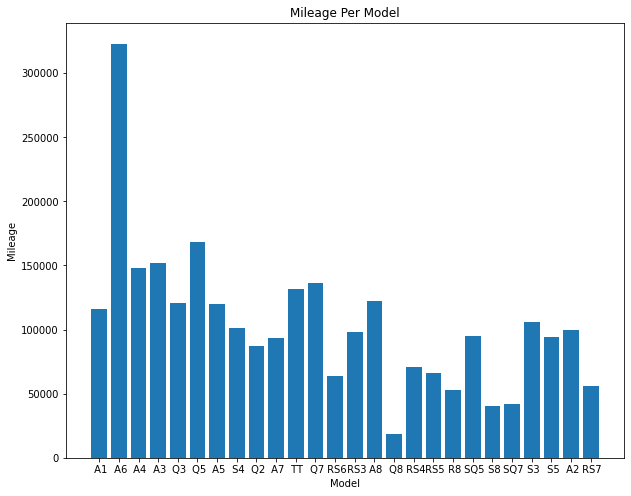

In [114]:
# Relationship between mileage and price
y3 = df.toPandas()["mileage"]
plt.figure(figsize=(10,8))
plt.bar(x2,y3)
plt.xlabel("Model")
plt.ylabel("Mileage")
plt.title(label="Mileage Per Model")

Text(0.5, 1.0, 'Relationship between price and mileage')

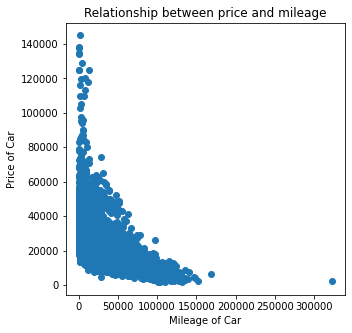

In [115]:
# Relationship between price and engine size
x12 = df.toPandas()["mileage"].values.tolist()
y12 = df.toPandas()["price"].values.tolist()
plt.figure(figsize=(5,5))
plt.scatter(x12,y12)
plt.xlabel("Mileage of Car")
plt.ylabel("Price of Car")
plt.title("Relationship between price and mileage")


Text(0.5, 1.0, 'Average Tax Per Model')

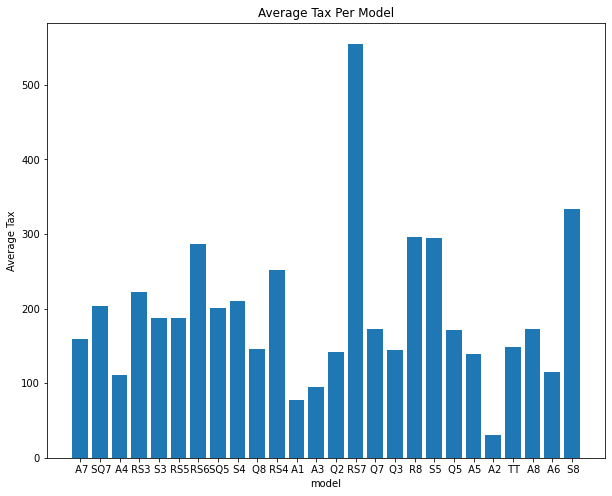

In [116]:
# Relationship between model and average tax per model
x4 = df.groupBy("model").mean()[["model","avg(tax)"]].toPandas()["model"].values.tolist()
y4 = df.groupBy("model").mean()[["model","avg(tax)"]].toPandas()["avg(tax)"].values.tolist()
plt.figure(figsize=(10,8))
plt.bar(x4, y4)
plt.xlabel("model")
plt.ylabel("Average Tax")
plt.title("Average Tax Per Model")


Text(0.5, 1.0, 'Types of Transmission')

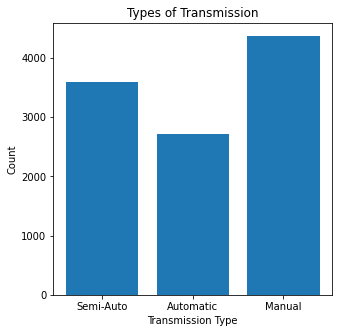

In [117]:
# Classifying the cars based on transmission
x5 = df.groupBy("transmission").count().toPandas()["transmission"].values.tolist()
y5 = df.groupBy("transmission").count().toPandas()["count"].values.tolist()
plt.figure(figsize=(5,5))
plt.bar(x5, y5)
plt.xlabel("Transmission Type")
plt.ylabel("Count")
plt.title("Types of Transmission")


Text(0.5, 1.0, 'Average Price of each transmission')

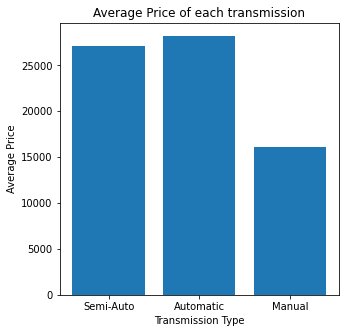

In [118]:
# Relationship between transmission and price
x6 = df.groupBy("transmission").count().toPandas()["transmission"].values.tolist()
y6 = df.groupBy("transmission").mean().toPandas()["avg(price)"].values.tolist()
plt.figure(figsize=(5,5))
plt.bar(x6, y6)
plt.xlabel("Transmission Type")
plt.ylabel("Average Price")
plt.title("Average Price of each transmission")


Text(0.5, 1.0, 'Number of car available based on Fuel Type')

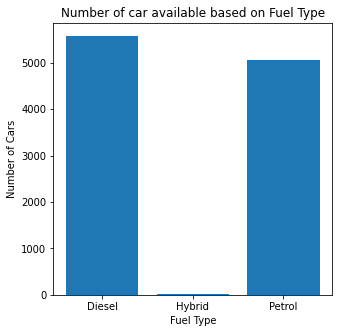

In [119]:
# Classification of cars based on their fuel type
x7 = df.groupBy("fuelType").count().toPandas()["fuelType"].values.tolist()
y7 = df.groupBy("fuelType").count().toPandas()["count"].values.tolist()
plt.figure(figsize=(5,5))
plt.bar(x7, y7)
plt.xlabel("Fuel Type")
plt.ylabel("Number of Cars")
plt.title("Number of car available based on Fuel Type")


Text(0.5, 1.0, 'Average Price of car based on Fuel Type')

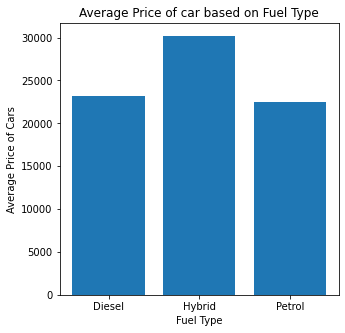

In [120]:
# Relationship between fuel type and price
x8 = df.groupBy("fuelType").count().toPandas()["fuelType"].values.tolist()
y8 = df.groupBy("fuelType").mean().toPandas()["avg(price)"].values.tolist()
plt.figure(figsize=(5,5))
plt.bar(x8, y8)
plt.xlabel("Fuel Type")
plt.ylabel("Average Price of Cars")
plt.title("Average Price of car based on Fuel Type")


Text(0.5, 1.0, 'Average Price based on Size of Engine')

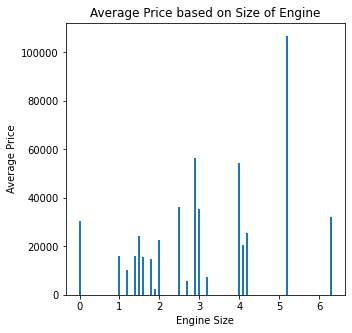

In [121]:
# Relationship between price and engine size
x9 = df.groupBy("engineSize").mean().toPandas()["engineSize"].values.tolist()
y9 = df.groupBy("engineSize").mean().toPandas()["avg(price)"].values.tolist()
plt.figure(figsize=(5,5))
plt.bar(x9,y9,width=0.05)
plt.xlabel("Engine Size")
plt.ylabel("Average Price")
plt.title("Average Price based on Size of Engine")


Text(0.5, 1.0, 'Average Price based on MPG(Miles-Per-Gallon)')

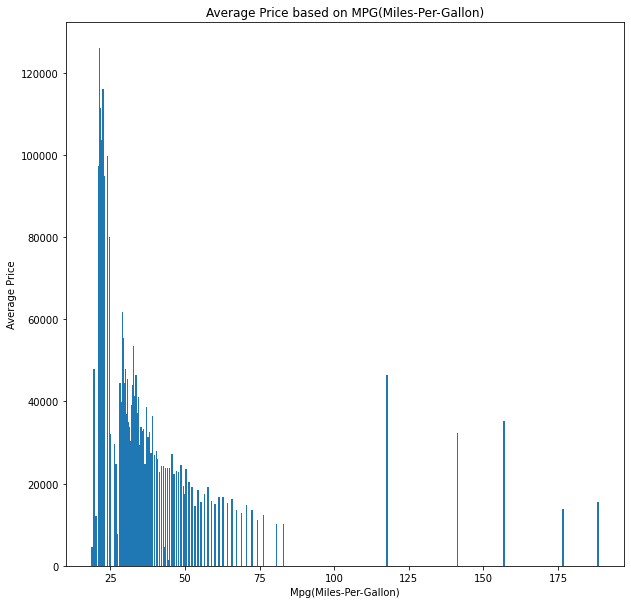

In [122]:
# Relationship between price and miles per gallon (mpg)
x10 = df.groupBy("mpg").mean().toPandas()["mpg"].values.tolist()
y10 = df.groupBy("mpg").mean().toPandas()["avg(price)"].values.tolist()
plt.figure(figsize=(10,10))
plt.bar(x10,y10,width=0.5)
plt.xlabel("Mpg(Miles-Per-Gallon)")
plt.ylabel("Average Price")
plt.title("Average Price based on MPG(Miles-Per-Gallon)")


**Feature Engineering(DataTransformation)**
* Performing oneHotEncoder

In [123]:
# converting categorical data in model column using the one hot encoder 
from pyspark.ml.feature import (VectorAssembler, VectorIndexer,OneHotEncoder,StringIndexer)

In [124]:
# Performing one-hot-encoding on model column
model_indexer = StringIndexer(inputCol='model', outputCol='modelIndex')
model_encoder = OneHotEncoder(inputCol='modelIndex', outputCol='modelVector')

In [125]:
# Performing one-hot-encoding on transmission column
transmission_indexer = StringIndexer(inputCol='transmission', outputCol='transmissionIndex')
transmission_encoder = OneHotEncoder(inputCol='transmissionIndex', outputCol='transmissionVec')

In [126]:
# Performing one-hot-encoding on fuel column
fuel_type_indexer = StringIndexer(inputCol='fuelType', outputCol='fuelTypeIndex')
fuel_type_encoder = OneHotEncoder(inputCol='fuelTypeIndex', outputCol='fuelTypeVector')

In [127]:
# Performing VectorAssembling on all columns except our target column
assembler = VectorAssembler(inputCols=['modelVector', 'year', 'transmissionVec'
            ,'mileage','fuelTypeVector','tax','mpg','engineSize'],outputCol='features')

**Building Regression Model**
* Using multiple regression algorithms

In [128]:
from pyspark.ml.regression import LinearRegression

In [129]:
linear_reg = LinearRegression(featuresCol='features',labelCol='price', maxIter=10)

In [130]:
from pyspark.ml.regression import LinearRegressionModel
linear_reg_model = LinearRegressionModel()

In [131]:
# Splitting the dataset into train and test 
trainData, testData = df.randomSplit([0.7,.03])

In [132]:
# Creating the pipeline for the model with linear regression algorithm
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[model_indexer,transmission_indexer,fuel_type_indexer,
                            model_encoder,transmission_encoder,fuel_type_encoder,
                            assembler,linear_reg])


In [133]:
linear_fit = pipeline.fit(trainData)

In [134]:
results = linear_fit.transform(testData)
# linear_fit.predict(testData)

In [135]:
results.head(5)

[Row(model=' A1', year=2013, price=8998, transmission='Manual', mileage=53529, fuelType='Petrol', tax=125, mpg=52.3, engineSize=1.4, modelIndex=3.0, transmissionIndex=0.0, fuelTypeIndex=1.0, modelVector=SparseVector(25, {3: 1.0}), transmissionVec=SparseVector(2, {0: 1.0}), fuelTypeVector=SparseVector(2, {1: 1.0}), features=SparseVector(34, {3: 1.0, 25: 2013.0, 26: 1.0, 28: 53529.0, 30: 1.0, 31: 125.0, 32: 52.3, 33: 1.4}), prediction=5496.4514918597415),
 Row(model=' A1', year=2014, price=8275, transmission='Manual', mileage=60000, fuelType='Petrol', tax=125, mpg=52.3, engineSize=1.4, modelIndex=3.0, transmissionIndex=0.0, fuelTypeIndex=1.0, modelVector=SparseVector(25, {3: 1.0}), transmissionVec=SparseVector(2, {0: 1.0}), fuelTypeVector=SparseVector(2, {1: 1.0}), features=SparseVector(34, {3: 1.0, 25: 2014.0, 26: 1.0, 28: 60000.0, 30: 1.0, 31: 125.0, 32: 52.3, 33: 1.4}), prediction=6810.087066974025),
 Row(model=' A1', year=2014, price=9782, transmission='Manual', mileage=27260, fuelTy

In [136]:
# Checking out a binaryclassification evalutor
from pyspark.ml.evaluation import BinaryClassificationEvaluator
my_eval = BinaryClassificationEvaluator(rawPredictionCol='prediction',
                                       labelCol='price')

In [137]:
results.select('price','prediction').show()

+-----+------------------+
|price|        prediction|
+-----+------------------+
| 8998|5496.4514918597415|
| 8275| 6810.087066974025|
| 9782|  9382.19734661933|
|10700| 8719.136541481595|
|13750|  11986.4677021862|
| 9490|12180.394068222027|
|10899| 8898.238263068255|
|10965|11560.456331003457|
|11217| 10947.51789478492|
|11750|11513.319306941703|
| 8500| 6419.935937521048|
|10999|11020.805904565845|
|11599|10923.456541713327|
|11899|15718.025691186544|
|11990|10164.241810647305|
|12046|11793.648867157754|
|13888|15469.385198357515|
|14671| 15302.59197063744|
|10175|12494.381706498563|
|11175|15931.483124695718|
+-----+------------------+
only showing top 20 rows



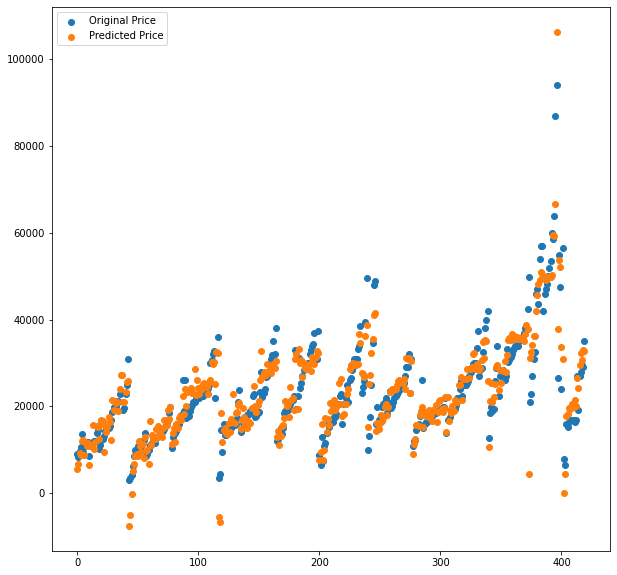

In [138]:
# Plotting the predicted value by linear regression against the original value
graph_res = results.select('price', 'prediction').toPandas()
x13 = graph_res["price"]
x14 = graph_res["prediction"]
plt.figure(figsize=(10,10))
plt.scatter(np.arange(0,len(x13),1),x13,label='Original Price')
plt.scatter(np.arange(0,len(x14),1),x14, label="Predicted Price")
plt.legend(loc="upper left")

In [139]:
my_eval.evaluate(results)

1.0

In [140]:
# Analyzing the performance of linear regression using RegressionEvaluator
from pyspark.ml.evaluation import RegressionEvaluator
my_ref_eval = RegressionEvaluator(predictionCol='prediction',labelCol='price')

In [141]:
my_ref_eval.evaluate(results)

4374.016810939943

In [142]:
# R2 score
my_ref_eval.evaluate(results, {my_ref_eval.metricName:"r2"})

0.8519464196799553

In [143]:
# RMSE score
my_ref_eval.evaluate(results, {my_ref_eval.metricName:"rmse"})

4374.016810939943

In [144]:
# MSE value
my_ref_eval.evaluate(results, {my_ref_eval.metricName:"mse"})

19132023.06238523

**RandomForest Regression Algorithm**

In [145]:
from pyspark.ml.regression import RandomForestRegressor

In [146]:
randomforest = RandomForestRegressor(featuresCol='features',labelCol='price')

In [147]:
# Creating a new pipeline with random Forest Regressor 
from pyspark.ml import Pipeline
pipeline1 = Pipeline(stages=[model_indexer,transmission_indexer,fuel_type_indexer,
                            model_encoder,transmission_encoder,fuel_type_encoder,
                            assembler,randomforest])
# df.na.drop()

In [148]:
# Executing the random forest regression algorithm
randomforestresult = pipeline1.fit(trainData)
randomFResult = randomforestresult.transform(testData)

In [149]:
print(randomFResult.head(5))

[Row(model=' A1', year=2013, price=8998, transmission='Manual', mileage=53529, fuelType='Petrol', tax=125, mpg=52.3, engineSize=1.4, modelIndex=3.0, transmissionIndex=0.0, fuelTypeIndex=1.0, modelVector=SparseVector(25, {3: 1.0}), transmissionVec=SparseVector(2, {0: 1.0}), fuelTypeVector=SparseVector(2, {1: 1.0}), features=SparseVector(34, {3: 1.0, 25: 2013.0, 26: 1.0, 28: 53529.0, 30: 1.0, 31: 125.0, 32: 52.3, 33: 1.4}), prediction=10947.494916604892), Row(model=' A1', year=2014, price=8275, transmission='Manual', mileage=60000, fuelType='Petrol', tax=125, mpg=52.3, engineSize=1.4, modelIndex=3.0, transmissionIndex=0.0, fuelTypeIndex=1.0, modelVector=SparseVector(25, {3: 1.0}), transmissionVec=SparseVector(2, {0: 1.0}), fuelTypeVector=SparseVector(2, {1: 1.0}), features=SparseVector(34, {3: 1.0, 25: 2014.0, 26: 1.0, 28: 60000.0, 30: 1.0, 31: 125.0, 32: 52.3, 33: 1.4}), prediction=10992.640203337249), Row(model=' A1', year=2014, price=9782, transmission='Manual', mileage=27260, fuelTyp

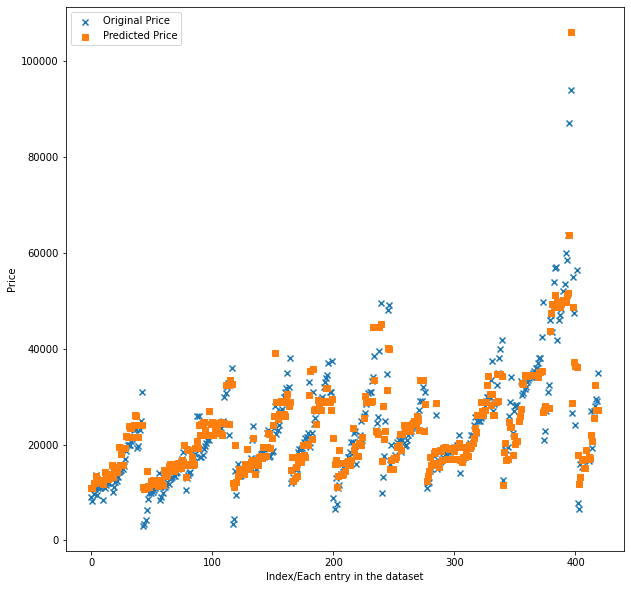

In [150]:
# Plotting the predicted price value by random forest regressor against the original price
graph_random = randomFResult.select('price', 'prediction').toPandas()
x15 = graph_random["price"]
x16 = graph_random["prediction"]
plt.figure(figsize=(10,10))
plt.scatter(np.arange(0,len(x15),1),x15,marker='x',label='Original Price')
plt.xlabel("Index/Each entry in the dataset")
plt.ylabel("Price")
plt.scatter(np.arange(0,len(x16),1),x16,marker='s', label="Predicted Price")
plt.legend(loc="upper left")

In [151]:
# Evaluating the performance of the random forest regressor using RegressionEvaluator 
from pyspark.ml.evaluation import RegressionEvaluator
my_ref_eval1 = RegressionEvaluator(predictionCol='prediction',labelCol='price')

In [152]:
my_ref_eval1.evaluate(randomFResult)

4154.7035968499285

In [153]:
# R2 Score
my_ref_eval.evaluate(randomFResult, {my_ref_eval.metricName:"r2"})

0.8664210238311869

In [154]:
# RMSE value
my_ref_eval.evaluate(randomFResult, {my_ref_eval.metricName:"rmse"})

4154.7035968499285

In [155]:
# MSE value
my_ref_eval.evaluate(randomFResult, {my_ref_eval.metricName:"mse"})

17261561.977677733

**Gradient Boosting Regression**

In [156]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator


# Train a GBT model.
gbt = GBTRegressor(featuresCol="features",labelCol="price", maxIter=10)

# Chain indexer and GBT in a Pipeline
pipeline_gbt = Pipeline(stages=[model_indexer,transmission_indexer,fuel_type_indexer,
                            model_encoder,transmission_encoder,fuel_type_encoder,
                            assembler, gbt])

# Train model.  This also runs the indexer.
model = pipeline.fit(trainData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", "price", "features").show(5)


+------------------+-----+--------------------+
|        prediction|price|            features|
+------------------+-----+--------------------+
|5496.4514918597415| 8998|(34,[3,25,26,28,3...|
| 6810.087066974025| 8275|(34,[3,25,26,28,3...|
|  9382.19734661933| 9782|(34,[3,25,26,28,3...|
| 8719.136541481595|10700|(34,[3,25,26,28,3...|
|  11986.4677021862|13750|(34,[3,25,27,28,3...|
+------------------+-----+--------------------+
only showing top 5 rows



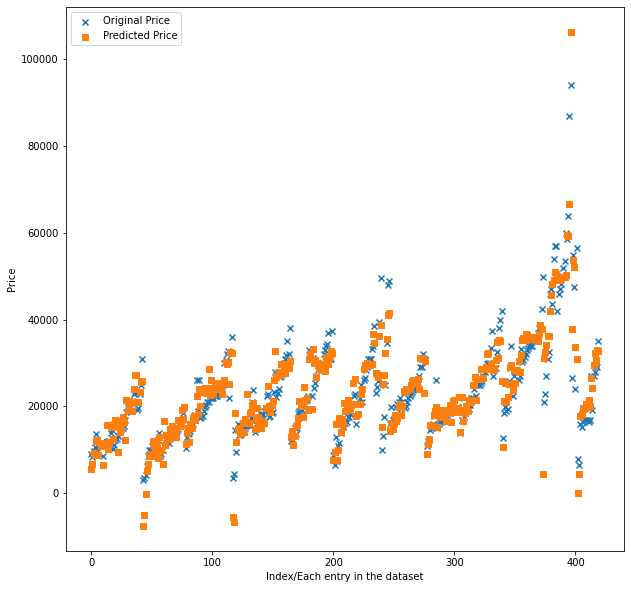

In [157]:
# Plotting the predicted price value by GBT against the original price
graph_gbt = predictions.select("prediction", "price").toPandas()
x17 = graph_gbt["price"]
x18 = graph_gbt["prediction"]
plt.figure(figsize=(10,10))
plt.scatter(np.arange(0,len(x17),1),x17,marker='x',label='Original Price')
plt.xlabel("Index/Each entry in the dataset")
plt.ylabel("Price")
plt.scatter(np.arange(0,len(x18),1),x18,marker='s', label="Predicted Price")
plt.legend(loc="upper left")

In [158]:

# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(
    labelCol="price", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)


Root Mean Squared Error (RMSE) on test data = 4374.02


In [159]:
evaluatorR2 = RegressionEvaluator(
    labelCol="price", predictionCol="prediction", metricName="r2")
r2 = evaluatorR2.evaluate(predictions)
print("R2 Score on test data= %g" % r2)
gbtModel = model.stages[1]
print(gbtModel)  # summary only


R2 Score on test data= 0.851946
StringIndexerModel: uid=StringIndexer_fe9612fa6f93, handleInvalid=error
